In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#We now load our csv dataset file


In [5]:
 df = pd.read_csv('/content/House_Price - House_Price.csv')

# We now do a snapy EDD


In [11]:
print(df.describe(include= 'all'))
df.info()
df.head()

             price  crime_rate  resid_area    air_qual    room_num  \
count   506.000000  506.000000  506.000000  506.000000  506.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean     22.528854    3.613524   41.136779    0.554695    6.284634   
std       9.182176    8.601545    6.860353    0.115878    0.702617   
min       5.000000    0.006320   30.460000    0.385000    3.561000   
25%      17.025000    0.082045   35.190000    0.449000    5.885500   
50%      21.200000    0.256510   39.690000    0.538000    6.208500   
75%      25.000000    3.677083   48.100000    0.624000    6.623500   
max      50.000000   88.976200   57.740000    0.871000    8.780000   

               age       dist1       dist2       dist3       dist4  \
count   506.000000  506.000000  506.000000  506.000000  506.000000   
unique         NaN 

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,NaN,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


#Time to detect outliers


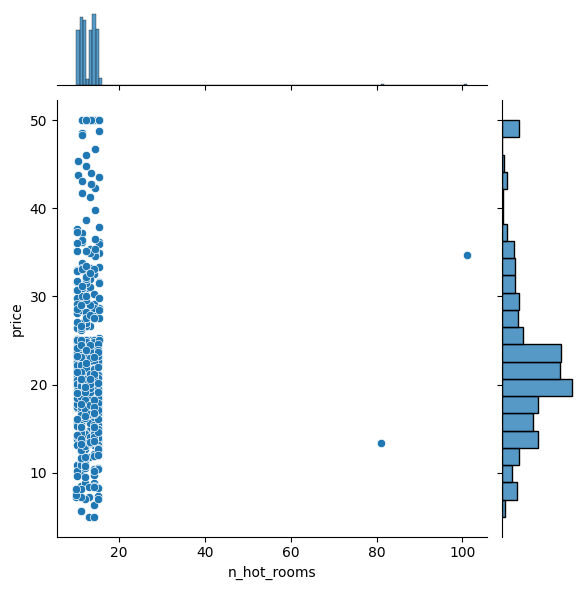

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
sns.jointplot(x='n_hot_rooms', y='price', data=df)
plt.show()

#In like manner for multiple columns...


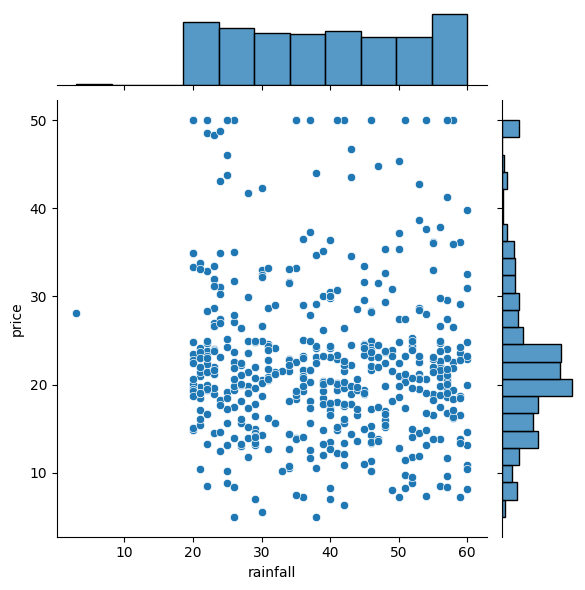

In [13]:
for col in ['rainfall']: # replace or extend with other numeric cols
    sns.jointplot(x=col, y='price', data=df)
    plt.show()

#Categorical inspection and visualization


Unique values in airport column: ['YES' 'NO']


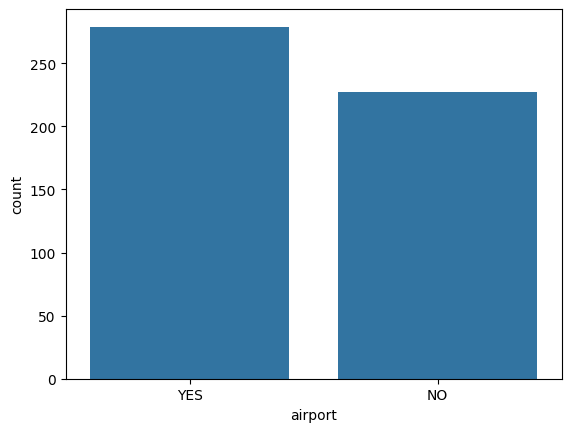

In [ ]:
print("Unique values in airport column:", df['airport'].unique())
sns.countplot(x='airport', data=df)
plt.show()

#General approach for categorical columns



Column: airport -- unique values: ['YES' 'NO']


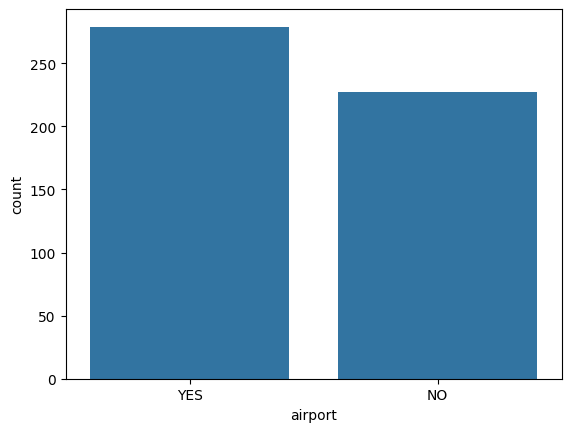

Column: waterbody -- unique values: ['River' 'Lake' nan 'Lake and River']


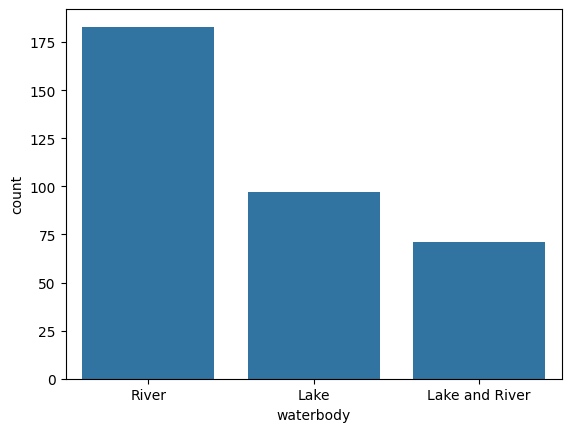

Column: bus_ter -- unique values: ['YES']


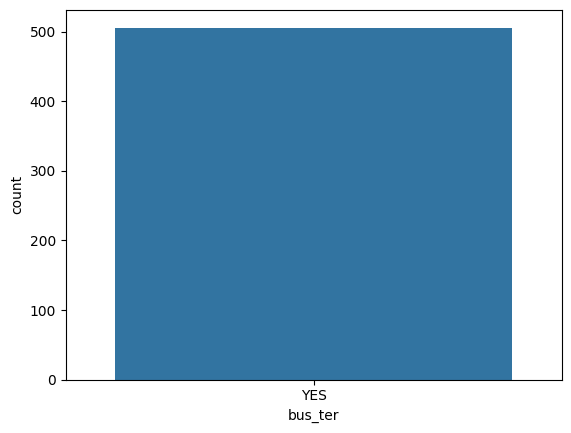

In [ ]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    print(f"Column: {col} -- unique values: {df[col].unique()}")
    sns.countplot(x=col, data=df)
    plt.show()

#Time to takle missing values
#After cleaning we print the data again to confirm


In [ ]:
df['waterbody'] = df['waterbody'].fillna(df['waterbody'].mode()[0])
df['n_hos_beds'] = df['n_hos_beds'].fillna(df['n_hos_beds'].mode()[0])
print(df.describe(include= 'all'))
df.info()
df.head()

             price  crime_rate  resid_area    air_qual    room_num  \
count   506.000000  506.000000  506.000000  506.000000  506.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean     22.528854    3.613524   41.136779    0.554695    6.284634   
std       9.182176    8.601545    6.860353    0.115878    0.702617   
min       5.000000    0.006320   30.460000    0.385000    3.561000   
25%      17.025000    0.082045   35.190000    0.449000    5.885500   
50%      21.200000    0.256510   39.690000    0.538000    6.208500   
75%      25.000000    3.677083   48.100000    0.624000    6.623500   
max      50.000000   88.976200   57.740000    0.871000    8.780000   

               age       dist1       dist2       dist3       dist4  \
count   506.000000  506.000000  506.000000  506.000000  506.000000   
unique         NaN 

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,River,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


We continue with dealing with outliers




**Capping**: Based on the visualizations, it appears that the outliers are on the higher end of the n_hot_rooms values. In this case, capping would be the appropriate method to handle these outliers. Capping involves setting a maximum value for the outliers, effectively replacing them with this upper limit. In layman terms when data is at higher side, you bring down to lower range


In [ ]:
np.percentile(df.n_hot_rooms,[99]) #we do the 99th percentile for capping

array([15.39952])

In [ ]:
uv = np.percentile(df.n_hot_rooms,[99])[0] #we want it to start from the very first column value

In [ ]:
df[(df.n_hot_rooms>uv)]
df.n_hot_rooms[(df.n_hot_rooms> 3*uv)] = 3*uv

/tmp/ipython-input-4263027841.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.n_hot_rooms[(df.n_hot_rooms> 3*uv)] = 3*uv
/tmp/ipython-input-4263027841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

So we check that its been effected...


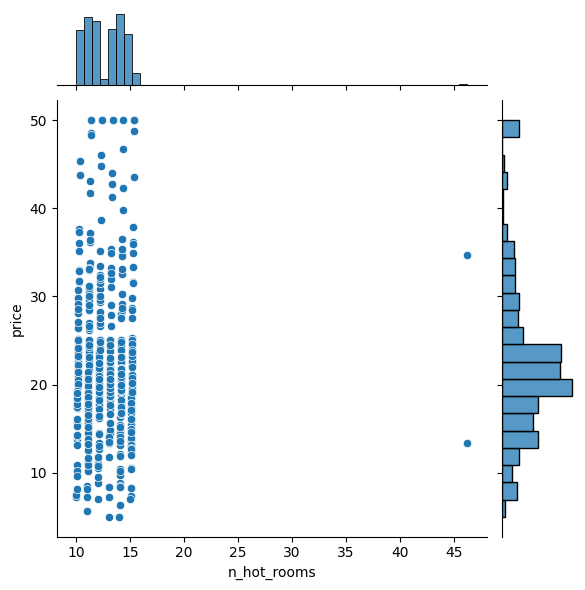

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
sns.jointplot(x='n_hot_rooms', y='price', data=df)
plt.show() #Before the outliers was around 80 but now it comes down to 46

**Flooring** is a technique used in data preprocessing to handle outliers that are significantly lower than the majority of the data. Similar to capping, which sets an upper limit for outliers, flooring sets a lower limit.

Essentially, any data point below a certain calculated minimum value (often a percentile like the 1st percentile) is replaced with that minimum value. This helps to reduce the impact of extremely low values on your analysis or model

Flooring is like an opposite to capping


In [ ]:
np.percentile(df.rainfall,[1])[0]

np.float64(20.0)

In [ ]:
np.percentile(df.rainfall,[1])[0]
lv = np.percentile(df.rainfall,[1])[0]
df.rainfall[(df.rainfall< 0.3*lv)] = 0.3*lv

/tmp/ipython-input-1444621087.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.rainfall[(df.rainfall< 0.3*lv)] = 0.3*lv
/tmp/ipython-input-1444621087.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

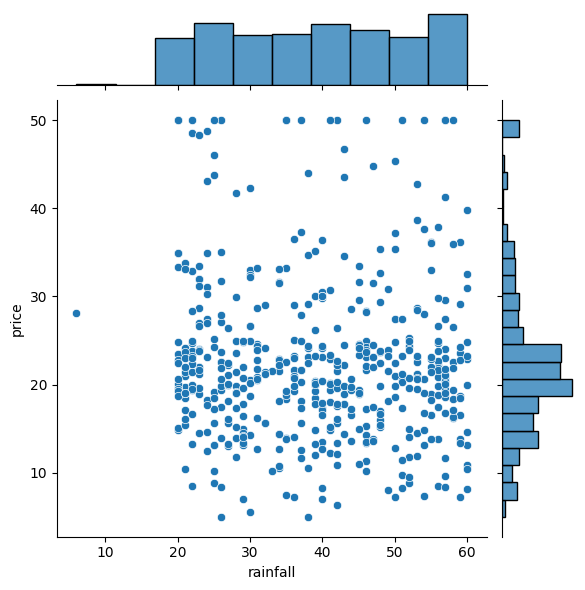

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
sns.jointplot(x='rainfall', y='price', data=df)
plt.show()

**Seasonality** can affect our data
Lets ask AI how that could happen here...

**Rainfall**: This column directly relates to weather patterns, which are seasonal. High rainfall seasons could correlate with certain property conditions or impact outdoor amenities like parks.
**Waterbody** **levels**: If the "waterbody" column relates to natural water sources, their levels could fluctuate seasonally due to rainfall and evaporation, potentially influencing the desirability or accessibility of properties near them.
**Parks**: The usage and appeal of parks could be seasonal, affecting nearby property values or interest.
**Air** **quality**: Air quality can sometimes have seasonal variations depending on factors like temperature inversions, pollution sources, and wind patterns


**Non Usable Variable.**
* If a table has just one value thats non usable bacause it won't relate with anything. An example is Bus_ter that has only YES
* if we get an initail data having low fill rate (i.e 60% data is missing), then we drop the entire data.
* Imagine we have a variable telling us make of cars. It can't help us in predicting house price so we delete such variable



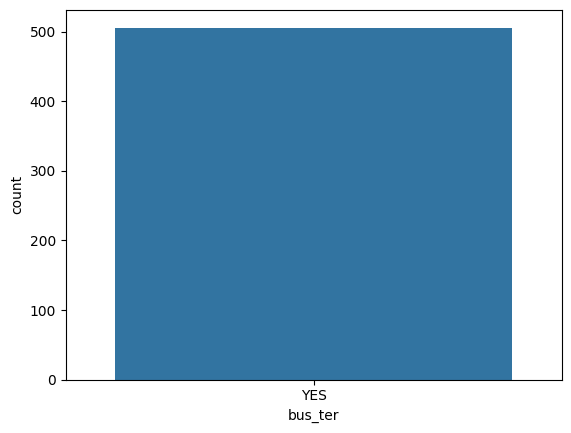

In [ ]:
df.bus_ter.unique().tolist()
sns.countplot(x=df.bus_ter)
df = df.drop('bus_ter', axis=1) #Now  after this when we check for bus_ter variable we'll get an error message

In [ ]:
df.bus_ter

AttributeError: 'DataFrame' object has no attribute 'bus_ter'

**Bivariate Analysis according to AI**
Bivariate analysis is a statistical method used to explore the relationship between two variables. This can involve looking at how changes in one variable are associated with changes in the other, and the strength and direction of that association. Common techniques for bivariate analysis include:
* Scatter plots: To visualize the relationship between two numerical variables.
* Correlation coefficients: To quantify the strength and direction of the linear relationship between two numerical variables.
* Cross-tabulation and chi-square tests: To examine the relationship between two categorical variables.
* Box plots or violin plots: To compare the distribution of a numerical variable across different categories of a categorical variable.

It helps in understanding how variables interact with each other, which is crucial for identifying patterns, making predictions, and building models.

**Histogram.**(AI) Now when we plot a histogram we get to see how skewed our data is.
A positively skewed data has the top of the bell on the left hand side. if the top of the bell is on the right hand side, then its negatively skewed.


**Skewed** **data**
skewed data refers to a situation where the distribution of values in a dataset is asssymetyric, deviating from the normal or bell-shaped distribution. Skewness can have implications for statistical analysis and modeling, as it can affect the accuracy of assumptions made by certain methods.


Type


There are two common types of skewness:
1. Positive skewness: In this case, the tail of the distribution extends towards the right side, indicating a larger number of smaller values and a few extremely large values.


2. Negative skewness: Here the tail of the distribution extends towards the left side, indicating a larger number of larger values and a few extremely small values


Handling skewed data is important because it can affect the performance of certain models and statistical tests that assume a normal distribution. Here are some common methods to handle skewed data:


1. Logarithmic transformation: Applying a logarithmic transformation to the skewed variable can compress the larger values and spread out the smaller values, reducing the skewness and making the distribution more symmatrical.


2. Square root transformation: Similar to the logarithmic transformation, the square root transformation can help reduce the skewness of the data.


3. Box-Cox transformation: The Box-Cox transformation is a more general transformation that can handle various types of skewness. It applies a power transformation to the data, allowing it to become more normally distributed.


/tmp/ipython-input-1143646034.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= df.price, hist=True, kde=True)


<Axes: ylabel='Density'>

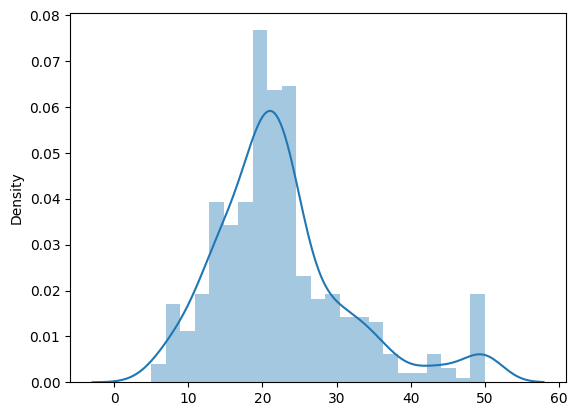

In [ ]:
sns.distplot(x= df.price, hist=True, kde=True)

**Logarithm or Square root** according to AI
Logarithm and square root transformations are often used in data preprocessing, particularly when dealing with skewed data or when preparing data for certain statistical models that assume normality.

In this context (according to AI), where you have already looked at the distribution of the price variable using a histogram (which showed some skewness), here are some potential places where you might consider using logarithm or square root transformations:
**Handling Skewed Variables**: If any of the numerical features (like crime_rate, resid_area, air_qual, age, poor_prop, or even price itself if you plan to model it) are highly skewed, applying a logarithm or square root transformation can help make their distributions more symmetrical and closer to a normal distribution. This can be beneficial for some regression models.
**Stabilizing Variance:** For some variables, the variance might not be constant across the range of values. Transformations can sometimes help stabilize the variance, which is another assumption of certain statistical models.
**Before Modeling:** When you move towards building a predictive model (like linear regression) to predict house prices, transforming skewed independent variables can improve the performance and interpretability of the model.

To determine if a transformation is needed and which one to use, you would typically:

Visualize the distribution of the variable (using histograms or density plots) to check for skewness.
Consider the relationship between the independent variables and the dependent variable (price). Transformations might help linearize non-linear relationships.

You could apply these transformations using functions like np.log() or np.sqrt() from NumPy to the relevant columns in your DataFrame.



<Axes: xlabel='crime_rate', ylabel='price'>

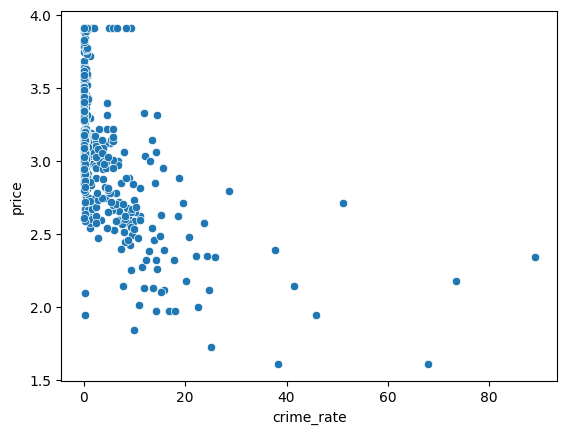

In [ ]:
sns.scatterplot(x=df.crime_rate, y=np.log(df.price)) #notice how we see abnomalities of some values towards 80

In [ ]:
np.log(df.crime_rate).describe() #The issue with logarithm is that it can lead to negative values. And imagine having a negative value for crime rate. Its not feasible!

,crime_rate
count,506.000000
mean,-0.780436
std,2.162050
min,-5.064036
25%,-2.500488
50%,-1.360641
75%,1.302119
max,4.488369


In [ ]:
np.log(1+ df.crime_rate).describe() #we rectify it by adding +1 to our code

,crime_rate
count,506.000000
mean,0.813418
std,1.022731
min,0.006300
25%,0.078853
50%,0.228336
75%,1.542674
max,4.499545


In [ ]:
# but square root doesn't need plus 1
np.sqrt(df.crime_rate).describe()

,crime_rate
count,506.000000
mean,1.229439
std,1.451263
min,0.079498
25%,0.286435
50%,0.506461
75%,1.917572
max,9.432720


In [ ]:
from scipy.stats import boxcox
pd.Series(boxcox(df['crime_rate'])[0].tolist()).describe()

,0
count,506.000000
mean,-1.098634
std,2.304579
min,-6.843991
25%,-2.891536
50%,-1.471371
75%,1.210442
max,3.516595


Now we finish it up


In [ ]:
df.crime_rate = np.log(1+df.crime_rate)

/tmp/ipython-input-4026131742.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df.crime_rate, hist = True, kde = True)


<Axes: ylabel='Density'>

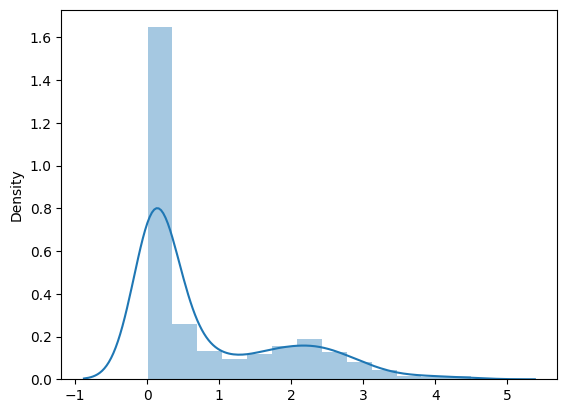

In [ ]:
sns.distplot(x=df.crime_rate, hist = True, kde = True)

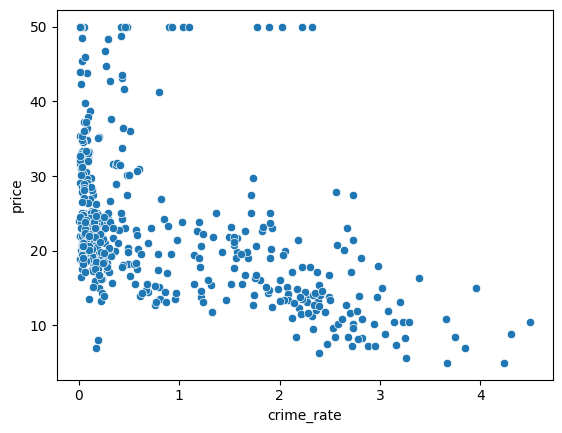

In [ ]:
sns.scatterplot(x=df.crime_rate, y=df.price)
plt.show()

**CONGRATULATIONS**!!!!!!


You have successfully cleaned the data


# Handling categorical columns


Handling categorical columns is an important task in data analysis and modeling as categorical variables contain non-numerical values that require special treatment. Categorical variables provide valuable information about the different groups or categories in a dataset. Here's a note on handling categorical columns:


Types of Categorical Columns


Categorical variables can be classified into two types:


1.   Nominal Variables: These variables have categories with no inherent order or ranking. Examples include gender (male, female)or city(Abuja, Lagos, Benin).
2.   Ordinal Variables: These variables have categories with a specific order or ranking. Examples include educational level (high school, college, graduate school) or satisfaction level (low, medium, high).




Data Encoding


Categorical variables need to be encoded into numerical values for analysis or modeling. Some common encoding techniques include:


1.   One-Hot Encoding: This technique creates binary columns for each category, representing the presence or absence of the category in each observation.






In [ ]:
encoded_df = pd.get_dummies(df) #Now with this code we no longer get YES and NO.But rather True and False
encoded_df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,...,n_hos_beds,n_hot_rooms,rainfall,parks,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River,bus_ter_YES
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,...,5.480,11.1920,23,0.049347,False,True,False,False,True,True
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,...,7.332,12.1728,42,0.046146,True,False,True,False,False,True
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,...,7.394,101.1200,38,0.045764,True,False,False,False,False,True
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,...,9.268,11.2672,45,0.047151,False,True,True,False,False,True
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,...,8.824,11.2896,55,0.039474,True,False,True,False,False,True


In [ ]:
encoded_df.shape,df.shape

((506, 22), (506, 20))

2. Ordinal Encoding: This technique assigns a unique integer value to each category, preserving the ordinal relationship among categories. It is suitable when the categories have an inherent order or rank.



In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

# Fill missing values in 'waterbody' with 'None'
df['waterbody'] = df['waterbody'].fillna('None')

# Manually specify the order mapping, including 'None'
order_mapping = [['None', 'River', 'Lake', 'Lake and River']]

# Create and fit the OrdinalEncoder with the custom order mapping
encoder = OrdinalEncoder(categories=order_mapping)
encoded_data = encoder.fit_transform(df[['waterbody']])
df['waterbody_encoded'] = encoded_data

In [ ]:
df.waterbody.unique().tolist()

['River', 'Lake', 'None', 'Lake and River']

In [ ]:
del df['waterbody']

In [ ]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,rainfall,bus_ter,parks,waterbody_encoded
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,23,YES,0.049347,1.0
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,42,YES,0.046146,2.0
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,38,YES,0.045764,0.0
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,45,YES,0.047151,2.0
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,55,YES,0.039474,2.0


3. Label Encoding: Similar to ordinal encoding, label encoding assigns a unique integer value to each category, but it does not preserve any inherent order. it is suitable when the categories are unordered.


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoded_data = encoder.fit_transform(df['airport'])
df['airport'] = encoded_data

df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,rainfall,bus_ter,parks,waterbody_encoded
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,1,5.480,11.1920,23,YES,0.049347,1.0
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,0,7.332,12.1728,42,YES,0.046146,2.0
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,0,7.394,101.1200,38,YES,0.045764,0.0
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,1,9.268,11.2672,45,YES,0.047151,2.0
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,0,8.824,11.2896,55,YES,0.039474,2.0


# Correlation


Correlation is a statistical measure that indicates the extent to which variables fluctuate together. A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases.


Examples


Some examples of data that have a high correlation:


*   Your caloric intake and your weight
*   The amount of time you study and your GPA (Me: I'd say debatable)




Some examples of data that have a low correlation (or none at all):


*   A person name and the chances of them commiting violence
*   The colour of a house and how much the building cost




# The Correlation Co-efficient


Definition


*   A correlation coefficient is a way to put to the relationship.
*   Correlation coefficient have a value between -1 and 1.


*   A "O" means there is no relationship between the variables at all,
*   While -1 or 1 means that there is a perfect negative or positive correlation






Examples


For instance(AI)

* A correlation coefficient of 0.9 would indicate a strong positive correlation (e.g., the amount of time you study and your GPA).
* A correlation coefficient of -0.8 would indicate a strong negative correlation (e.g., the outside temperature and heating costs).
* A correlation coefficient of 0.1 would indicate a very weak positive correlation (e.g., a person's height and their salary).
* A correlation coefficient of -0.05 would indicate a very weak negative correlation (e.g., the color of a house and its selling price).

# The Correlation matrix


Definition


*   A correlation matrix is a table showing correlation coefficients between variables.
*   Each cell in the table shows a correlation between two variables.


*   A correlation matrix is used as a way to summarize data, as input into a more advanced analysis, and as a diagnostic for  advanced analysis






Application




*   To summarize a larger amount of data when the goal is to see patterns.
*   To identify colinearity in the data




Multicolinearity


Definition




*   Multicolinearity exists whenever two or more of the predictors in a  regression model are moderately or highly correlated.


Effects




*   Multicolinearity results in a change in the signs as well as in the partial regression coefficients from one sample to another sample.
*   Multicolinearity makes it tedious to assess the relative importance of the independent variables in explaining the variation caused by the dependent variable.




Solution




*   Remove highly correlated independent variables by looking at the correlation matrix and VIF




Solution (AI)

* Remove highly correlated independent variables by looking at the correlation matrix and VIF (Variance Inflation Factor). VIF quantifies how much the variance of the estimated regression coefficient is increased due to multicollinearity. A high VIF for a variable indicates it is highly correlated with other predictor variables.
* Combine correlated variables into a single variable (e.g., create an average or index).
* Use regularization techniques (like Lasso or Ridge regression) that can handle multicollinearity.
* Collect more data, if possible, as multicollinearity can be a sample-specific issue.

<Axes: >

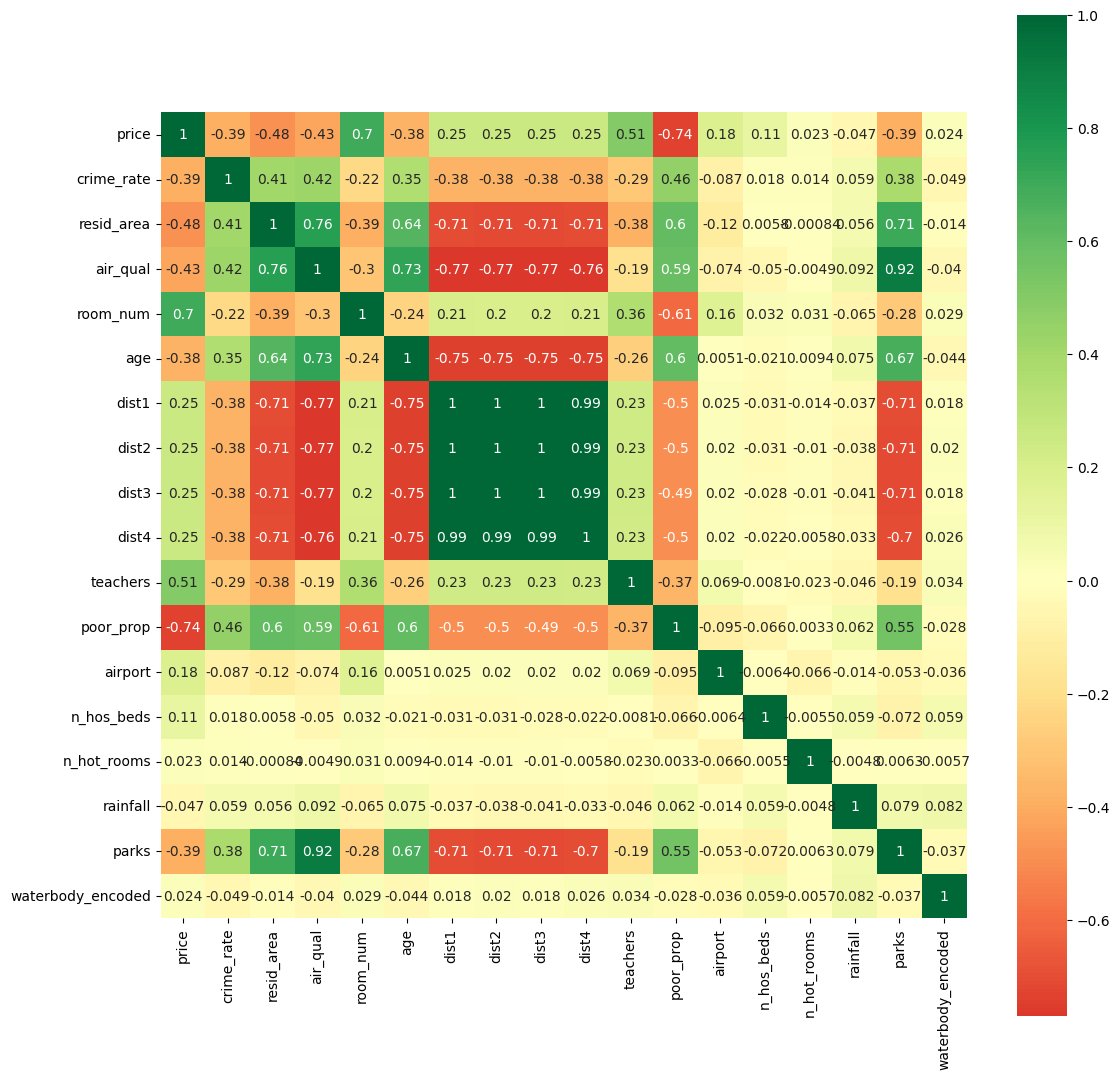

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13, 13))
# Plot the correlation matrix as a heatmap
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', center=0, square=True)

In [ ]:
df['avg_dist'] = (df.dist1+df.dist2+df.dist3+df.dist4)/4


In [ ]:
del df['dist1']
del df['dist2']
del df['dist3']
del df['dist4']


In [ ]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,NaN,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


<Axes: >

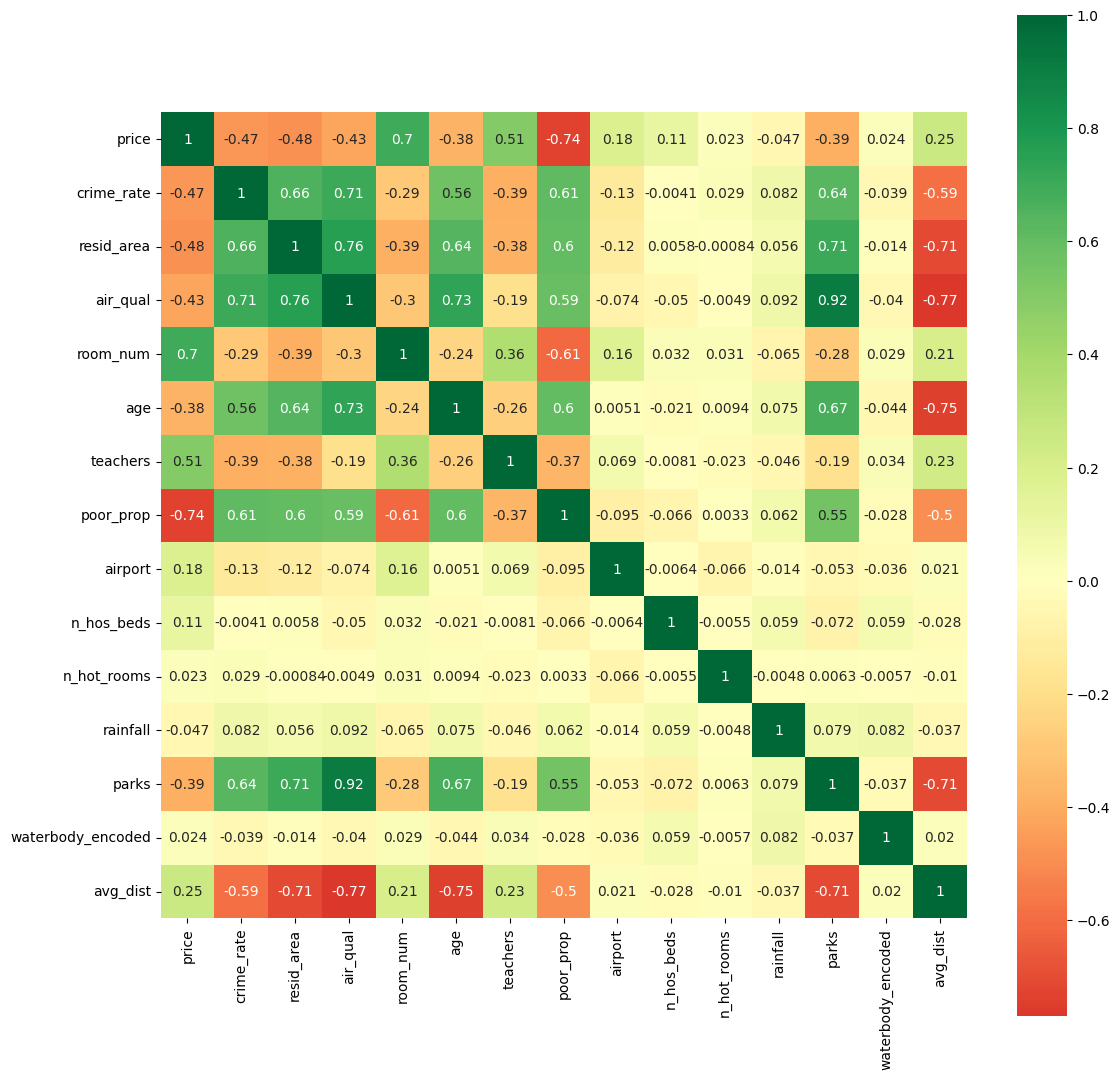

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13, 13))
# Plot the correlation matrix as a heatmap
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', center=0, square=True)

In [ ]:
del df['parks']

In [ ]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,rainfall,bus_ter,parks,waterbody_encoded
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,1,5.480,11.1920,23,YES,0.049347,1.0
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,0,7.332,12.1728,42,YES,0.046146,2.0
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,0,7.394,101.1200,38,YES,0.045764,0.0
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,1,9.268,11.2672,45,YES,0.047151,2.0
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,0,8.824,11.2896,55,YES,0.039474,2.0


In [ ]:
df.to_csv("Cleaned House Data.csv", index = False)

# REGRESSION


Regression analysis is a statistical modeling technique used to explore the relationship between a dependent variable and one or more independent variables. Linear regression is a specific type of regression analysis that assumes a linear relationship between the variables. Here's a short note on linear regression, starting with univariate analysis before considering multiple linear regression:


**Linear Regression:**

Linear regression aims to model the relationship between a dependent variable (response variable) and one independent variable (predictor variable) through a linear equation of the form



# Y =wx + b,

where Y represents the dependent variable,


X represents the independent variable,


b is the y-intercept, and


w is the slope coefficient.


The goal of linear regression is to estimate the coefficients (w and b)that minimizes the sum of the squared differnces between the observed and predicted values.


Linear regression assumes that the relationship between the variables is additive, linear, and has constant variance (homoscedasticity).


It is suitable for continuous numeric variables and can be used for both prediction and inference.


**Univariate Analysis:**


Univariate analysis involves examining the relationship between the dependent and a single independent variable. In the context of linear regression, univariate analysis helps determine if there is a significant linear relationship between the dependent variable and the predictor variable.


Key steps in univariate analysis include data visualization, correlation analysis, and assessing the assumptions of linear regression (linearity, normality, homoscedasticity).


Multiple Linear Regression:


Multiple linear regression extends the concept of linear regression to incoporate multiple independent variables. It allows for modeling the relationship between a dependent variable and multiple predictor variables through a linear equation of the form


#            Y = b + w1X1 + w2X2+...+wn*Xn           

Multiple linear regression enables us to evaluate the unique contribution of each predictor variable while controlling for the effects of other variables.


The coefficients (b, w1,w2,...,wn) are estimated using techniques like ordinary least squares (OLS) to minimize the sum of squared differences between the observed and predicted values.


<Axes: xlabel='room_num', ylabel='price'>

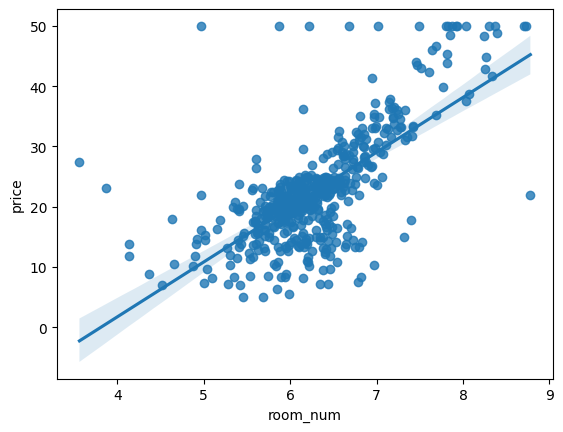

In [ ]:
sns.regplot (x = "room_num", y = "price", data=df)

# Univariant analysis with python


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
y = df['price']
x = df[['room_num']]

In [ ]:
lm2 = LinearRegression()
lm2.fit(x,y)

LinearRegression()

In [ ]:
print(lm2.intercept_, lm2.coef_)

-34.6592431230972 [9.09966966]


In [ ]:
y_pred1 = lm2.predict(x)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y, y_pred1)

0.4848389736536868

In [ ]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,rainfall,bus_ter,parks,waterbody_encoded
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,1,5.480,11.1920,23,YES,0.049347,1.0
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,0,7.332,12.1728,42,YES,0.046146,2.0
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,0,7.394,101.1200,38,YES,0.045764,0.0
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,1,9.268,11.2672,45,YES,0.047151,2.0
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,0,8.824,11.2896,55,YES,0.039474,2.0


# Multiple Linear Regression with Python

In [ ]:
y = df['price']
x = df.drop("price",axis=1)

In [ ]:
lr = LinearRegression()


In [ ]:
x = x.dropna()
y = y[x.index]
lr.fit(x,y) #When I put only this line of code it said there were still some missing values so the lines of code above took care of that

LinearRegression()

In [ ]:
lr.intercept_, lr.coef_

(np.float64(-6.848096157978684),
 array([-7.03816219e-02, -3.74791214e-02, -1.98282576e+01,  4.17249435e+00,
        -7.19859537e-03, -6.87090633e-01,  1.17564307e+00, -1.56788383e+00,
        -1.57582438e-01,  9.75260556e-01, -5.35326237e-01,  1.20186934e+00,
         3.68828368e-01,  3.54453465e-02,  1.53766050e-02,  5.49827496e+01,
        -1.47761337e-01]))

In [ ]:
y_pred = lr.predict(x)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y, y_pred) #Now accuracy has moved up to 72% because other facets of the data is now considered as well

0.7241356297565933

In [ ]:
df.to_csv("Cleared House Data.csv", index = False)

In [ ]:
import ipywidgets as widgets
from IPython.display import display
from sklearn.linear_model import LinearRegression #Replace with your actual model

model = lr

x_train = x

#Create a dictionary to store the input widgets
input_widgets = {}

#Create text input widgets for each feature in x_train
for feature in x_train.columns:
  input_widgets[feature] = widgets.Text(description=feature + ':')
prediction = 0
#Create a prediction function
def make_prediction(b):
  input_features = {}

  #Retrieve the input values from the widgets
  for feature, widget in input_widgets.items():
    input_features[feature] = widget.value

  #Prepare the input data as a dictionary
  input_data = {feature: [value] for feature, value in input_features.items()}

  #Create a Dataframe from the input data
  input_df = pd.DataFrame(input_data)

  #Make a prediction
  prediction = model.predict(input_df)

  #Display the prediction
  with oputput:
    print(f"Predicted Price: {prediction[0]}")

#Create a button for prediction
predict_button = widgets.Button(description='Predict', button_style= "danger")
predict_button.on_click(make_prediction)
output = widgets.Output()

#Display the widgets and prediction button
input_widgets_list = list(input_widgets.values())
input_widgets_list.append(predict_button)
input_widgets_list.append(output)
display(*input_widgets_list)

#Create an output widget to display the prediction
output = widgets.Output()


Text(value='', description='crime_rate:')

Text(value='', description='resid_area:')

Text(value='', description='air_qual:')

Text(value='', description='room_num:')

Text(value='', description='age:')

Text(value='', description='dist1:')

Text(value='', description='dist2:')

Text(value='', description='dist3:')

Text(value='', description='dist4:')

Text(value='', description='teachers:')

Text(value='', description='poor_prop:')

Text(value='', description='airport:')

Text(value='', description='n_hos_beds:')

Text(value='', description='n_hot_rooms:')

Text(value='', description='rainfall:')

Text(value='', description='parks:')

Text(value='', description='waterbody_encoded:')

Button(button_style='danger', description='Predict', style=ButtonStyle())

Output()